
# Baseball Case Study

### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Renaming & Calling the dataframe

In [2]:
df=pd.read_csv('baseball_data.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


### Extracting the dataset informations

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


- The dataframe has 17 no of coumns from 0 to 16.
- The dataframe has data types as integer and float.
- The dataframe has non-null values.
- The dataframe has occupied 4.1 kb of space on the system it refers.

### Checking the data shape

In [4]:
df.shape

(30, 17)

- The dataframe has 30 number of rows and 17 number of columns.

### Obtaining the column names inolved in our dataset.

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

- Each column represents the following variables as :- 
 
'W' = Wins --> Target Variable

 
  'R' = Runs
  
  'AB'= At Bats
  
  'H' = Hits
  
  '2B'= Doubles
  
  '3B'= Triples
  
  'HR'= Homeruns
  
  'BB'= 
  
  'SO'= Strikeouts
  
  'SB'= Stolen Bases
  
  'RA'= Runs Allowed
  
  'ER'= Earned Runs
  
  'ERA'= Earned Run Average
  
  'CG'= 
  
  
  'SHO'= Shoutouts
  
  'SV'= Saves
  
  'E'= Errors

### Checking the data-types under the respective columns.

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

- The complete dataset is numeric form , no row/column with string data is present.
- The majority of data is in integer form , only one column EarnedRunAverage (ERA) is having float data.

### Checking the null values , if there's any

In [7]:
df.isnull()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- There are no rows/columns with null value.

### Checking the tota no of values in each column

In [8]:
df.notnull().sum()

W      30
R      30
AB     30
H      30
2B     30
3B     30
HR     30
BB     30
SO     30
SB     30
RA     30
ER     30
ERA    30
CG     30
SHO    30
SV     30
E      30
dtype: int64

- Each column has total number of 30 values in each row,the data is uniformly distributed.

### Graph for the null values of dataset

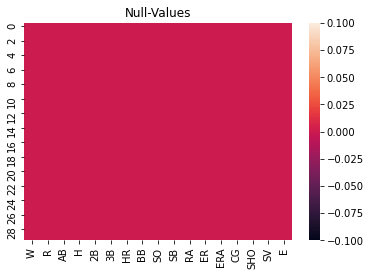

In [9]:
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()

- The graph represents there is no null value in the dataset.

In [10]:
df.loc[df['W']==" "]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


- There are no null values even with spaces.

In [11]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

## Description of the dataframe

In [12]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


 The dataframe description gives -
- The total count of values in each columns i.e 30.
- The mean and standard deviation values of each columns.
- The quartile values for 25the , 50th and 75th persentiles.
- The maximum values for each columns as well.

## Graphical Representation of the dataframe

### Graph for the Target Variable - 'W' 

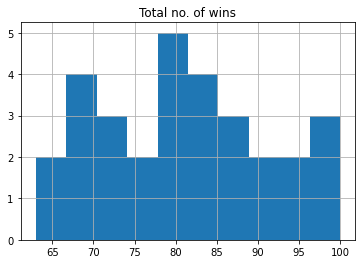

In [13]:
df['W'].hist(grid=True) # analysis on single attribute of the dataset
plt.title('Total no. of wins')
plt.show()

- We can conclude that our target variable is in continous form , so it's a linear regression problem.

## Graph for the dependent variables :-

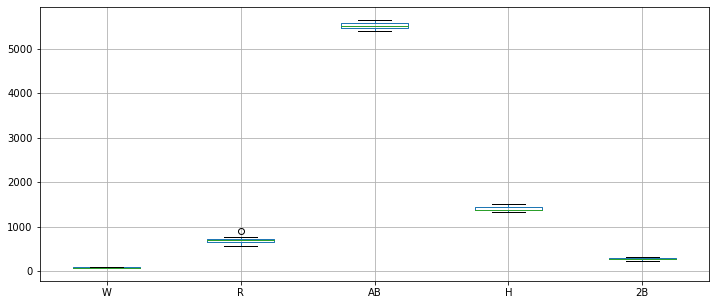

In [14]:
# plotting boxplots for first 5 columns
df.iloc[:,0:5].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

From the graph we can conclude that :
- There are no outliers present in columns W , AB , H and 2B.
- Outliers can be seen to be present in 'R' column.

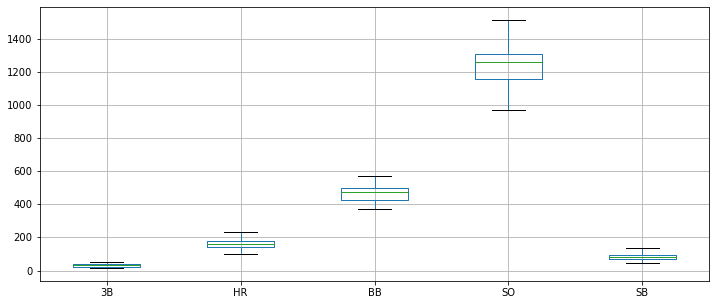

In [15]:
# plotting boxplots for first 5 columns
df.iloc[:,5:10].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

From the graph we can conclude that :
- There are no outliers present in the columns 3B , HR , BB , SO and SB.

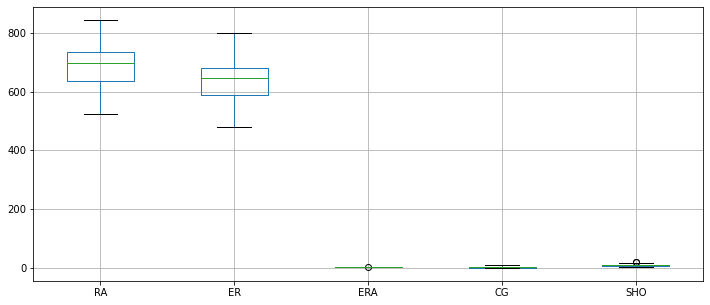

In [16]:
# plotting boxplots for first 5 columns
df.iloc[:,10:15].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

From the graph we can conclude that :
- There are no outliers present in the columns RA ,CG and ER.
- Outiers can be seen to be present in the columns ERA and SHO.

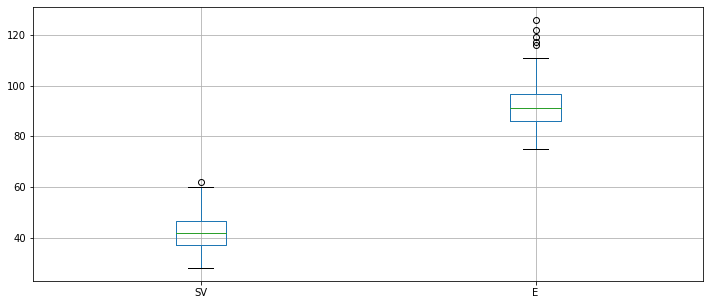

In [17]:
# plotting boxplots for first 5 columns
df.iloc[:,15:18].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

From the graph we can conclude that :
- outliers can be seen to be present in columns SV and E.

## Visualisation of the data :

In [37]:
import seaborn as sns

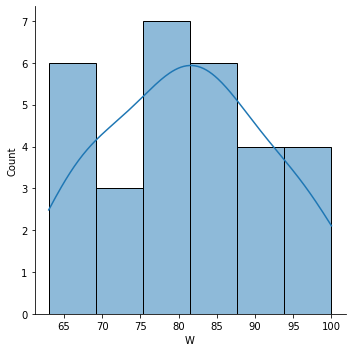

In [80]:
sns.displot(df['W'],kde=True)

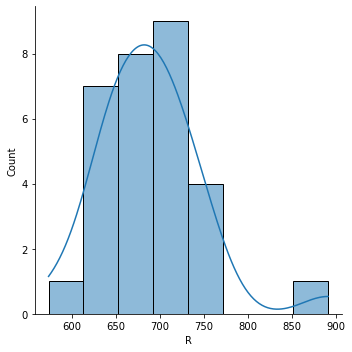

In [81]:
sns.displot(df['R'],kde=True)

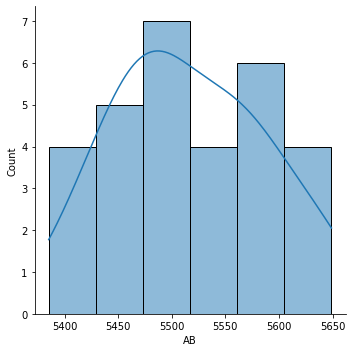

In [82]:
sns.displot(df['AB'],kde=True)

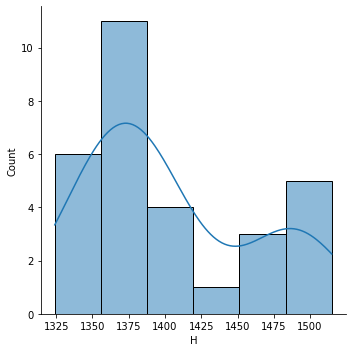

In [85]:
sns.displot(df['H'],kde=True)

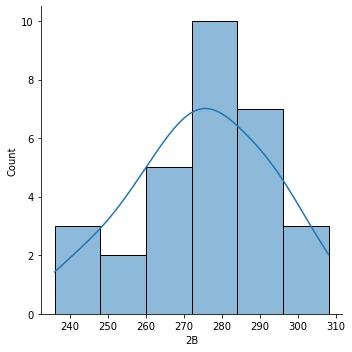

In [86]:
sns.displot(df['2B'],kde=True)

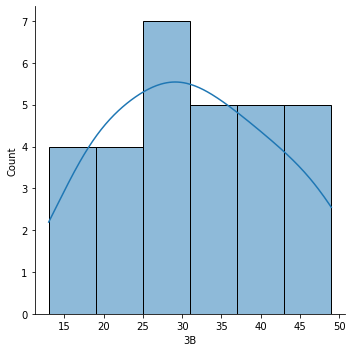

In [87]:
sns.displot(df['3B'],kde=True)

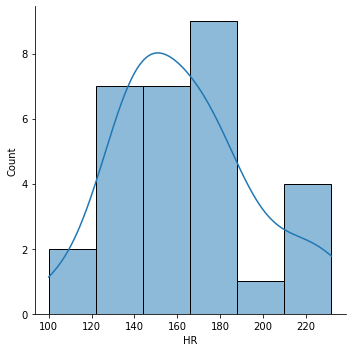

In [88]:
sns.displot(df['HR'],kde=True)

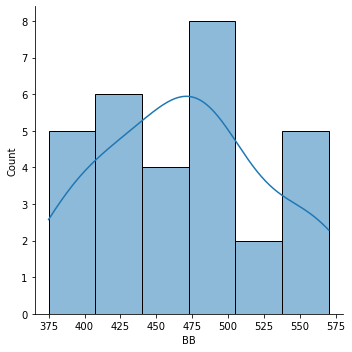

In [89]:
sns.displot(df['BB'],kde=True)

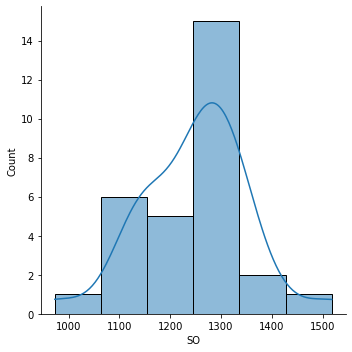

In [90]:
sns.displot(df['SO'],kde=True)

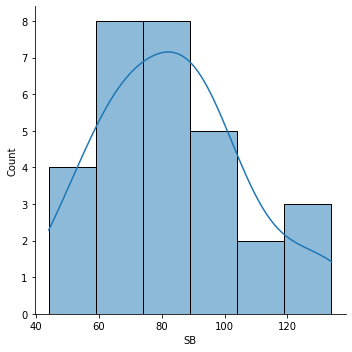

In [91]:
sns.displot(df['SB'],kde=True)

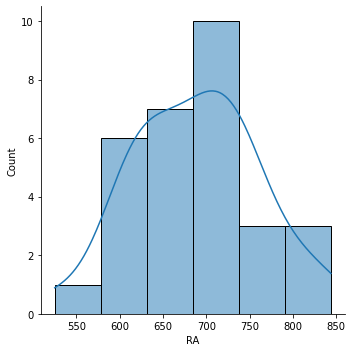

In [92]:
sns.displot(df['RA'],kde=True)

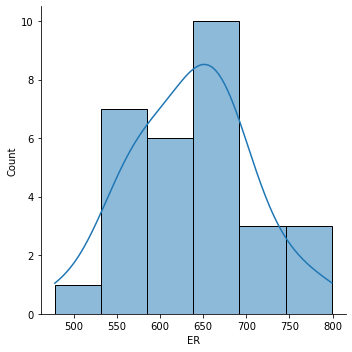

In [93]:
sns.displot(df['ER'],kde=True)

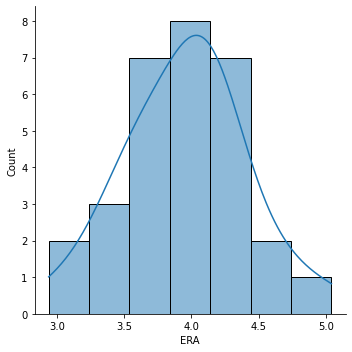

In [94]:
sns.displot(df['ERA'],kde=True)

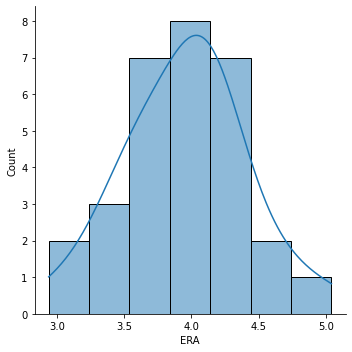

In [95]:
sns.displot(df['ERA'],kde=True)

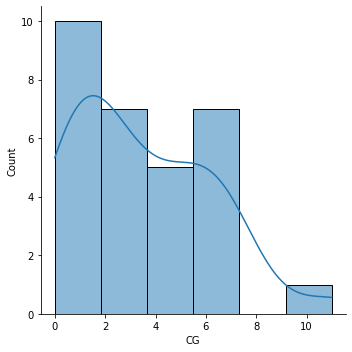

In [96]:
sns.displot(df['CG'],kde=True)

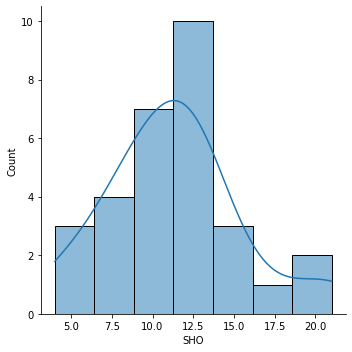

In [97]:
sns.displot(df['SHO'],kde=True)

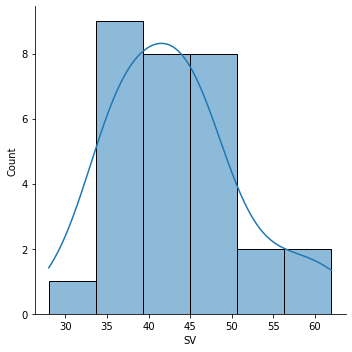

In [98]:
sns.displot(df['SV'],kde=True)

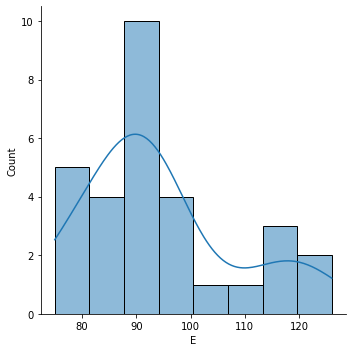

In [99]:
sns.displot(df['E'],kde=True)

## Description of the dataframe

In [100]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


 The dataframe description gives -
- The total count of values in each columns i.e 17 .
- The mean and standard deviation values of each columns.
- The quartile values for 25the , 50th and 75th persentiles.
- The maximum values for each columns as well.

<AxesSubplot:>

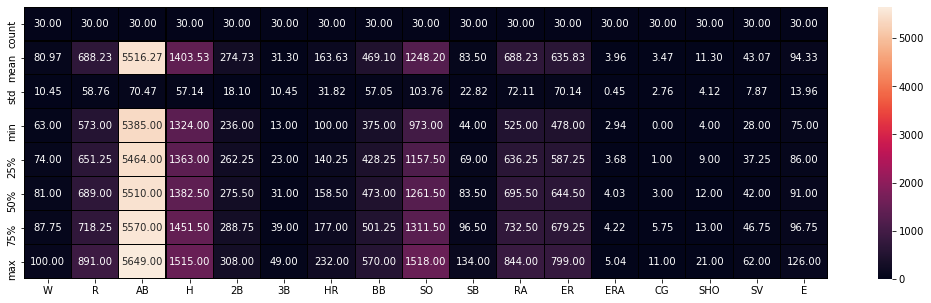

In [102]:
plt.figure(figsize=(18,5))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

## Correlation of the columns with the target variables :-

In [103]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

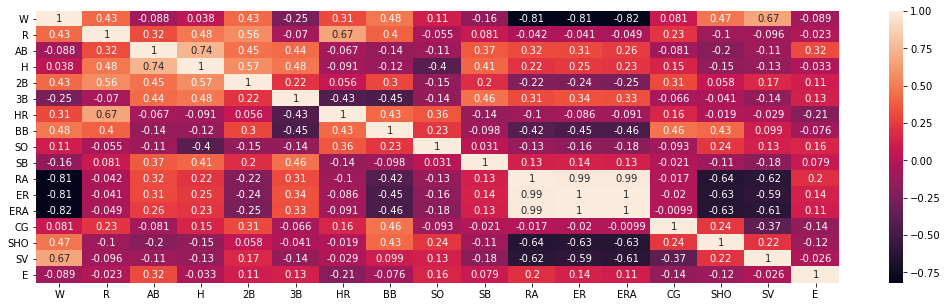

In [104]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(),annot=True)

### Checking the columns which are positivly or negatively related to target variable :-

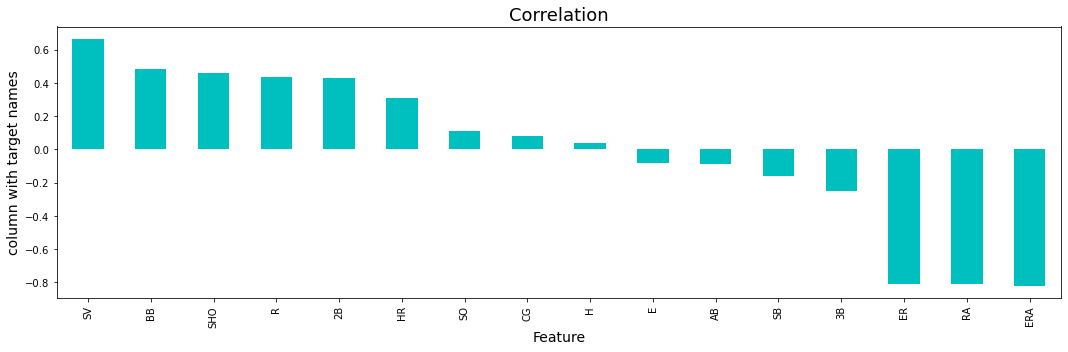

In [151]:
plt.figure(figsize=(18,5))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Variables above 0 are positvely related to the target variable.
- Variables below 0 are negatively related to the target variable.

### Checking the skewness 

In [107]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

keeping +/- 0.5 as the range for skeness.

In [108]:
x=df.drop('W',axis=1)
y=df['W']

In [110]:
x.shape

(30, 16)

In [111]:
y.shape

(30,)

In [112]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [113]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

### Handling the skewness

In [114]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001746
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

In [115]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

## Encoding the Dataframe :

In [116]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [117]:
le=preprocessing.LabelEncoder()
df['ERA']=le.fit_transform(df['ERA'])
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,9,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,18,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,7,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,13,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,27,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,11,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,15,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,17,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,10,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,24,3,10,40,97


### Box-plot  graph for the variables :-

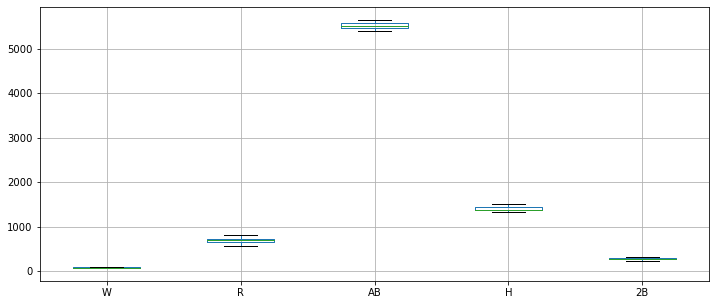

In [152]:
# plotting boxplots for first 5 columns
df.iloc[:,0:5].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

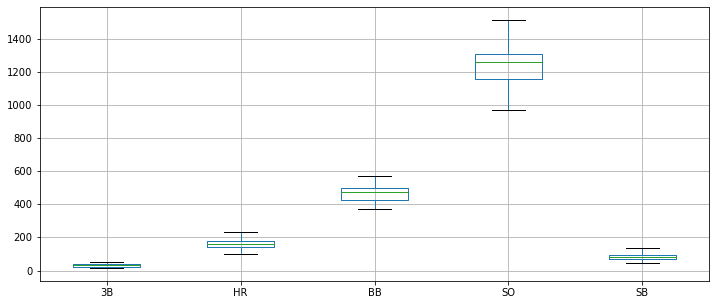

In [119]:
# plotting boxplots for next 5 columns
df.iloc[:,5:10].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

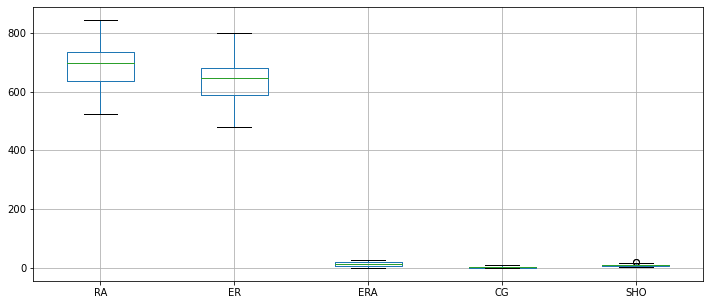

In [120]:
df.iloc[:,10:15].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

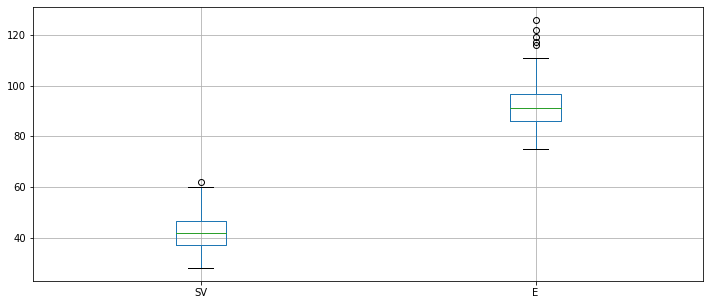

In [121]:
df.iloc[:,15:18].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

- Rare presence of outliers is there in the dataset.

### Handling the outliers :-

In [124]:
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence

In [125]:
df 

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,9,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,18,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,7,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,13,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,27,7,12,35,86
5,93,818,5509,1480,308,17,232,570,1151,88,670,609,11,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,15,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,17,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,10,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,24,3,10,40,97


In [154]:
df.shape # rows--> 30 , columns--> 17

(30, 17)

- There is no data loss.

## Scaling the data with Min-Max Scaler


In [127]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
mms=MinMaxScaler()
lr=LinearRegression()

In [128]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is :{r2_score(y_test,pred_test)} ')
    print('\n')        

At random state 0,the training accuracy is:0.9681348515901735
At random state 0,the testing accuracy is :0.3703799193209145 


At random state 1,the training accuracy is:0.9733856732704862
At random state 1,the testing accuracy is :0.33060984367410773 


At random state 2,the training accuracy is:0.9937308934727275
At random state 2,the testing accuracy is :-2.405551706592453 


At random state 3,the training accuracy is:0.9733765745975087
At random state 3,the testing accuracy is :0.5683741160453148 


At random state 4,the training accuracy is:0.9664066038869364
At random state 4,the testing accuracy is :0.28682960380033373 


At random state 5,the training accuracy is:0.9508521861901349
At random state 5,the testing accuracy is :0.7359925713179839 


At random state 6,the training accuracy is:0.9489496261745087
At random state 6,the testing accuracy is :0.8374394125305838 


At random state 7,the training accuracy is:0.9695004701946728
At random state 7,the testing accuracy is :0.04

At random state 85,the training accuracy is:0.9863842711751547
At random state 85,the testing accuracy is :0.5664060583037399 


At random state 86,the training accuracy is:0.9540397445195026
At random state 86,the testing accuracy is :0.7195508330200989 


At random state 87,the training accuracy is:0.9687002546269103
At random state 87,the testing accuracy is :0.28407174295418125 


At random state 88,the training accuracy is:0.9862444598066185
At random state 88,the testing accuracy is :-0.5260801027110724 


At random state 89,the training accuracy is:0.9732863608140346
At random state 89,the testing accuracy is :-0.46914388212834 


At random state 90,the training accuracy is:0.9504754378494281
At random state 90,the testing accuracy is :0.8714959874112751 


At random state 91,the training accuracy is:0.9623700298739246
At random state 91,the testing accuracy is :0.024973014021381745 


At random state 92,the training accuracy is:0.9668188961365005
At random state 92,the testing 

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=24)

In [132]:
lr.fit(x_train,y_train)

LinearRegression()

In [133]:
pred_test=lr.predict(x_test)

In [134]:
print(r2_score(y_test,pred_test))

-2.2531326614546603


In [135]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('error :')

print('Mean absolute error :',mean_absolute_error(y_test,pred_test))
print('Mean squared error :',mean_squared_error(y_test,pred_test))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('r2_score value :',r2_score(y_test,pred_test))



error :
Mean absolute error : 6.180070214896377
Mean squared error : 46.2077618851519
Root Mean Squared Error :  6.797629137070652
r2_score value : -2.2531326614546603


## Testing - Linear Regression with Lasso and Ridge models¶



In [136]:
from sklearn.linear_model import Lasso,Ridge

In [137]:
ls=Lasso(alpha=0.0001)
# ls=lasso(alpha=0.1) --> default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9924900318017592

In [138]:
Rg=Ridge(alpha=.001)
Rg.fit(x_train,y_train)
Rg.score(x_train,y_train)

0.9927777242140489

## Cross Validation Score for each model¶



In [147]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=5)
print('The cross validation score for the Linear Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.9520223175393904.')

The cross validation score for the Linear Regression model is : 0.04075540667465847
The difference between accuracy and crossvalidation score is :0.9520223175393904.


In [144]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(ls,x,y,cv=5)
print('The cross validation score for the Lasso Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.9794874854201138.')

The cross validation score for the Lasso Regression model is : 0.013002546381645486
The difference between accuracy and crossvalidation score is :0.9794874854201138.


In [148]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(Rg,x,y,cv=5)
print('The cross validation score for the Ridge Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.9612656956123247.')

The cross validation score for the Ridge Regression model is : 0.031512028601724175
The difference between accuracy and crossvalidation score is :0.9612656956123247.


- The Linear Regression model has the minimum no of diference between accuracy and cross validation score ,so It is our best suited model for this datset.

## Saving the best model

In [149]:
import pickle

filename='pickledtcfile.pkl'
pickle.dump(lr,open('pickledtcfile','wb'))

In [150]:
saved_model=pickle.load(open('pickledtcfile','rb'))
saved_model.predict(x_test)

array([82.22266919, 79.34366312, 90.87161114, 90.19380794, 78.63383917,
       85.07056953, 89.67532563])